In [ ]:
import pandas as pd
import numpy as np
import duckdb
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from modelling_utils import get_abt_estacoes_vizinhas,split_com_sem_vizinha,particao_por_estacao,feature_selection

modelling_conn = duckdb.connect('modelling_db')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
key_columns = ['latitude','longitude','dt_medicao_mes', 'dt_medicao_ano']
geo_columns = ['vl_declividade', 'vl_altitude', 'vl_distancia_oceano', 'vl_aspecto_relevo']
local_vars_columns = ['vl_temperatura_maxima', 'vl_temperatura_media','vl_temperatura_minima', 'vl_umidade_relativa_maxima','vl_umidade_relativa_media', 'vl_umidade_relativa_minima','vl_velocidade_vento_2m_maxima', 'vl_velocidade_vento_2m_media','vl_velocidade_vento_10m_media']
chirps_columns = ['vl_precipitacao_chirps']
cpc_columns = ['vl_precipitacao_cpc', 'vl_temperatura_maxima_cpc','vl_temperatura_minima_cpc']
gpm_final_run_columns = ['vl_precipitacao_gpm_final_run']
gpm_late_run_columns = ['vl_precipitacao_gpm_late_run']
power_columns = ['vl_precipitacao_power','vl_temperatura_maxima_2m_K_power', 'vl_temperatura_media_2m_K_power','vl_temperatura_minima_2m_K_power', 'vl_umidade_relativa_2m_power','vl_pressao_nivel_superficie_power', 'vl_irradiancia_allsky_power','vl_direcao_vento_10m_power','vl_direcao_vento_2m_power','vl_temperatura_orvalho_2m_K_power', 'vl_vento_10m_power','vl_vento_medio_2m_power', 'vl_vento_maximo_2m_power','vl_vento_maximo_10m_power']
estacao_vizinha_columns = ['vl_precipitacao_vizinha','vl_prioridade_vizinha']
target = 'vl_precipitacao'
produtos_columns = chirps_columns+cpc_columns+gpm_final_run_columns+gpm_late_run_columns+power_columns

featurelist_com_vizinha = key_columns + geo_columns + local_vars_columns + produtos_columns + estacao_vizinha_columns
featurelist_sem_vizinha = key_columns + geo_columns + local_vars_columns + produtos_columns

In [ ]:
threshold_prioridade = 0.5
percent_datetime_partitioning_split = 0.7

abt_estacoes_vizinhas = get_abt_estacoes_vizinhas(modelling_conn=modelling_conn)

model_params = {
    "tree_method": "hist",
    "device": "cuda"
}

abt_com_vizinha,abt_sem_vizinha = split_com_sem_vizinha(abt_estacoes_vizinhas,threshold_prioridade)

treinamento_com_vizinha,validacao_com_vizinha = particao_por_estacao(abt_com_vizinha,percent_datetime_partitioning_split)
treinamento_sem_vizinha,validacao_sem_vizinha = particao_por_estacao(abt_sem_vizinha,percent_datetime_partitioning_split)

X_com_vizinha_treino,y_com_vizinha_treino = feature_selection(treinamento_com_vizinha,featurelist_com_vizinha,target)
X_sem_vizinha_treino,y_sem_vizinha_treino = feature_selection(treinamento_sem_vizinha,featurelist_sem_vizinha,target)
X_com_vizinha_validacao,y_com_vizinha_validacao = feature_selection(validacao_com_vizinha,featurelist_com_vizinha,target)
X_sem_vizinha_validacao,y_sem_vizinha_validacao = feature_selection(validacao_sem_vizinha,featurelist_sem_vizinha,target)

In [ ]:


    

    model_com_vizinha = Model(**model_params)
    model_sem_vizinha = Model(**model_params)

    model_com_vizinha.fit(X_com_vizinha_treino, y_com_vizinha_treino)
    model_sem_vizinha.fit(X_sem_vizinha_treino, y_sem_vizinha_treino)

    return model_com_vizinha,model_sem_vizinha

In [ ]:
def 

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [4]:
resultados_lista = []

for threshold in np.arange(0.7, 0.99, 0.01):
    print(f"\n=== Treinando modelos com threshold_prioridade = {threshold:.3f} ===")
    resultados = treinar_modelos_precipitacao(
        abt_estacoes_vizinhas=abt_estacoes_vizinhas,
        threshold_prioridade=threshold,
        percent_datetime_partitioning_split=percent_datetime_partitioning_split,
        featurelist_com_vizinha=featurelist_com_vizinha,
        featurelist_sem_vizinha=featurelist_sem_vizinha
    )
    
    resultados_lista.append({
        'threshold_prioridade': threshold,
        'rmse_com_vizinha': resultados['com_vizinha']['rmse'],
        'mae_com_vizinha': resultados['com_vizinha']['mae'],
        'r2_com_vizinha': resultados['com_vizinha']['r2'],
        'rmse_sem_vizinha': resultados['sem_vizinha']['rmse'],
        'mae_sem_vizinha': resultados['sem_vizinha']['mae'],
        'r2_sem_vizinha': resultados['sem_vizinha']['r2']
    })


df = pd.DataFrame(resultados_lista)



=== Treinando modelos com threshold_prioridade = 0.700 ===


C:\Users\Mateus Santos Rochas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:26:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)



=== Treinando modelos com threshold_prioridade = 0.710 ===

=== Treinando modelos com threshold_prioridade = 0.720 ===

=== Treinando modelos com threshold_prioridade = 0.730 ===

=== Treinando modelos com threshold_prioridade = 0.740 ===

=== Treinando modelos com threshold_prioridade = 0.750 ===

=== Treinando modelos com threshold_prioridade = 0.760 ===

=== Treinando modelos com threshold_prioridade = 0.770 ===

=== Treinando modelos com threshold_prioridade = 0.780 ===

=== Treinando modelos com threshold_prioridade = 0.790 ===

=== Treinando modelos com threshold_prioridade = 0.800 ===

=== Treinando modelos com threshold_prioridade = 0.810 ===

=== Treinando modelos com threshold_prioridade = 0.820 ===

=== Treinando modelos com threshold_prioridade = 0.830 ===

=== Treinando modelos com threshold_prioridade = 0.840 ===

=== Treinando modelos com threshold_prioridade = 0.850 ===

=== Treinando modelos com threshold_prioridade = 0.860 ===

=== Treinando modelos com threshold_pri

In [5]:
df = pd.DataFrame(resultados_lista)


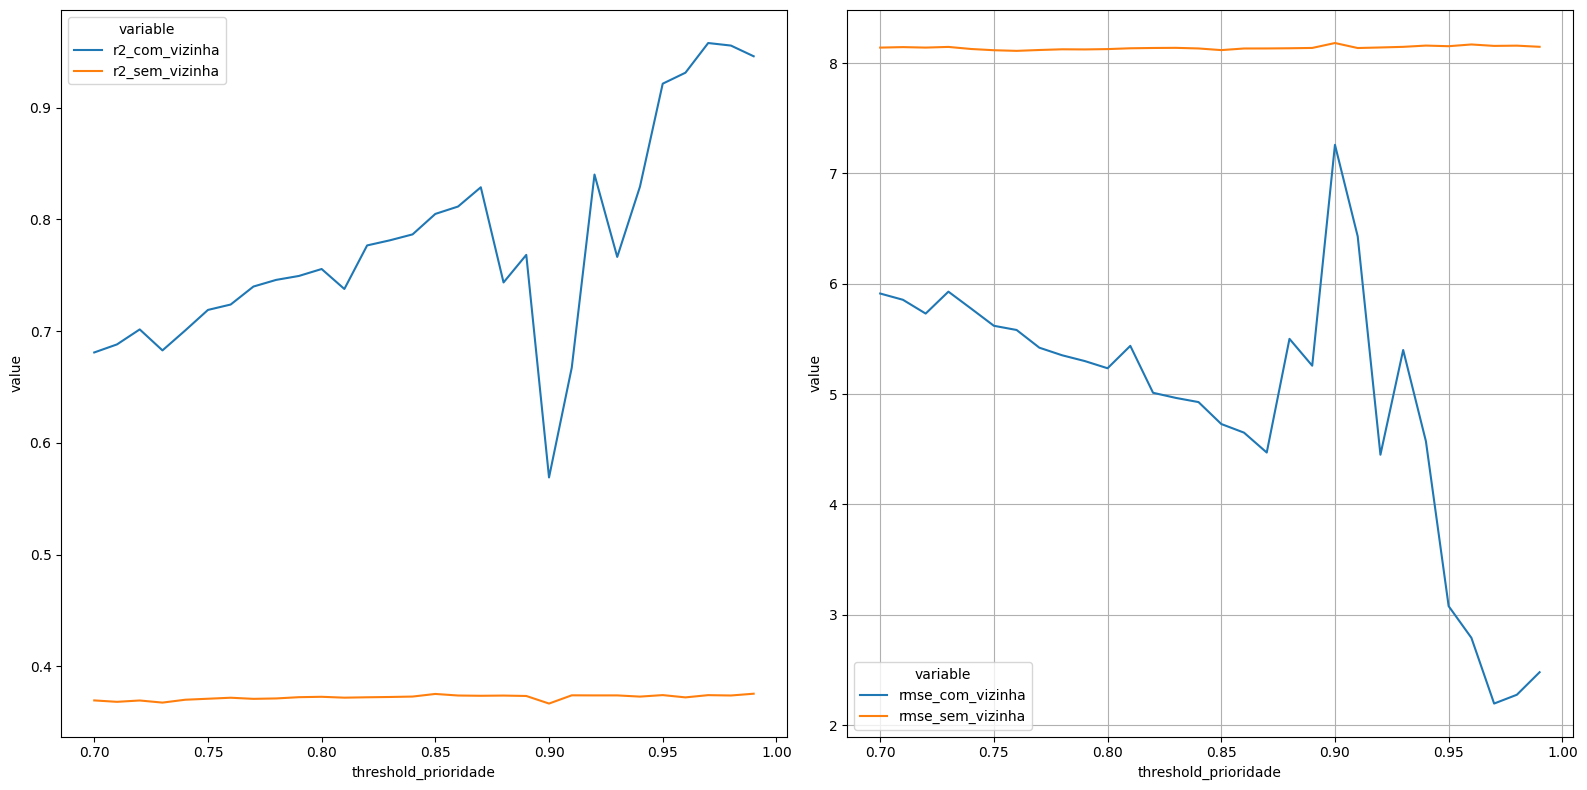

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=False)

sns.lineplot(data=pd.melt(df[['threshold_prioridade','r2_com_vizinha','r2_sem_vizinha']],id_vars=['threshold_prioridade']),x='threshold_prioridade',y='value',hue='variable',ax=axes[0])
sns.lineplot(data=pd.melt(df[['threshold_prioridade','rmse_com_vizinha','rmse_sem_vizinha']],id_vars=['threshold_prioridade']),x='threshold_prioridade',y='value',hue='variable',ax=axes[1])

plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
# PROXIMOS PASSOS:
# > Testar Random Forest
# > Analise de relevancia de variaveis (talvez PCA?)
# > Implementar métricas personalizadas
# > Testar undersampling
# > Testar oversampling (com smoteR)
# > Testar preenchimento de dados faltantes